In [1]:
import pandas as pd
from data import Data

In [2]:
df = pd.read_excel('data/IR1_7k_news.xlsx')
df_content = df['content']
df_title = df['title']
d = Data(df_title, df_content)

Generate and save positional indexes before removing stopwords

In [3]:
d.generate_positional_index(remove_stopwords=False)
d.save_positional_index(file_name='positionalIndex_with_stopwords.json')

Generate and save positional indexes after removing stopwords

In [4]:
d.generate_positional_index()
d.save_positional_index(file_name='positionalIndex.json')

Plot Zip's and Heaps Law before removing stopwords

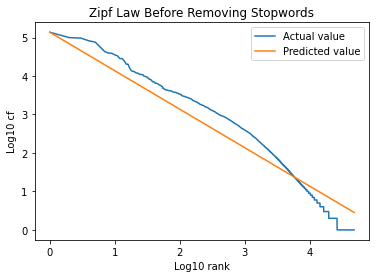

y = 0.58197 * x + 0.66265
All vocab numbers: 48310, All token numbers: 2890435
Predicted all vocab numbers: 26470.327826741537


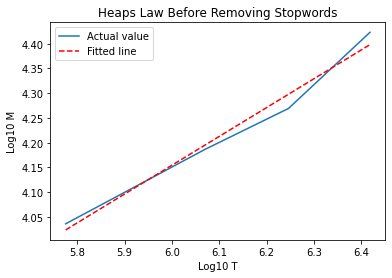

In [5]:
d.read_positional_index(file_name='positionalIndex_with_stopwords.json')
d.plot_zipf_law('Zipf Law Before Removing Stopwords')
d.plot_heaps_law([500, 1000, 1500, 2000], remove_stopwords=False, plot_title='Heaps Law Before Removing Stopwords')

Plot Zip's and Heaps Law after removing stopwords

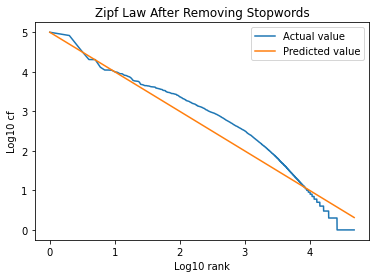

y = 0.57835 * x + 0.68441
All vocab numbers: 48257, All token numbers: 1870302
Predicted all vocab numbers: 20501.436701433806


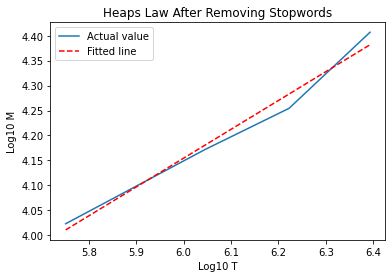

In [6]:
d.read_positional_index()
d.plot_zipf_law('Zipf Law After Removing Stopwords')
d.plot_heaps_law([500, 1000, 1500, 2000], remove_stopwords=True, plot_title='Heaps Law After Removing Stopwords')

# Queries

## One-word Queries

In [3]:
d.read_positional_index()
d.print_result(d.retrieve_one_word('بینالملل'), remove_stopwords=True)

{'total_num': 1, '2465': [836]}
Doc ID: 2464, Doc Title: دولت سیزدهم؛ چالش‌ها و فرصت‌ها

این بسته اقدام احتمالا شامل اقداماتی درباره بازسازی و پوست اندازی ساختار تحریم‌ها، شناسایی و کورکردن مسیرهای دور زدن تحریمها توسط ایران، شکل دادن به اتحادهای منطقه ای علیه ایران با محوریت پان ترکیسم و پان عربیسم ضد ایرانی، حذف ایران از مسیرهای ترانزیتی تجاری، ایجاد بحران های داخلی با محوریت تجزیه طلبی، فعال کردن مسیرهایی علیه ایران در سازمانهای بینالمللی نظیر شورای امنیت و...

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
d.print_result(d.retrieve_one_word('ژیمناستیک'), remove_stopwords=True)

{'total_num': 36, '633': [12, 30, 52, 85, 96, 103, 142, 151, 167, 204, 216, 254], '1368': [13, 44, 75, 77, 86, 107, 133, 141, 161, 165, 171, 178], '1457': [28, 247], '3616': [10], '3665': [10, 48, 111], '3879': [225, 439], '4057': [478], '4189': [219, 433, 681]}
Doc ID: 632, Doc Title: خیرخواه: برخی به دنبال فلج کردن ژیمناستیک هستند/ با بایکوت فدراسیون موفقیت‌ها بیشتر شد

رضا خیرخواه در گفت‌وگو با خبرنگار ورزشی خبرگزاری فارس، درباره عدم اعزام تیم ملی ژیمناستیک هنری به مسابقات جهانی ژاپن اظهار داشت: واقعا بابت این موضوع متاسفم.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

فدراسیون از مدت‌ها قبل درخواست اعزام تیم ملی ژیمناستیک را به شورای برون مرزی وزارت ورزش داده بود و بارها این مسئله را پیگیری کرد اما متاسفانه این شورا هیچ پاسخی نداد.

----------------------------------------------

## Bi-word Queries

In [5]:
d.print_result(d.retrieve_bi_word('واکسن آسترازنکا'), remove_stopwords=True)

{'4932': [23], '5570': [23], '5686': [144, 283, 350], '5824': [813], '5826': [233, 254, 279, 302, 758, 1695], '5832': [813], '5834': [233, 254, 279, 302, 758, 1695], '5858': [140], '6337': [318]}
Doc ID: 4931, Doc Title: محموله ۱.۴ میلیون دوزی واکسن کرونا وارد کشور شد

مهرداد جمال ارونقی در گفت‌وگو با ایسنا تصریح کرد: محموله جدید واکسن کرونا ساعت ۱۰ از مبداء ایتالیا وارد فرودگاه امام خمینی شد که حاوی یک میلیون و ۴۰۰ هزار دوز واکسن آسترازنکا از مجموعه کوواکس است.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Doc ID: 5569, Doc Title: محمول

In [6]:
d.print_result(d.retrieve_bi_word('دانشگاه امیرکبیر'), remove_stopwords=True)

{'1754': [2922], '1960': [430], '2132': [449], '2793': [16, 117, 139, 198], '2794': [160, 221], '7237': [33]}
Doc ID: 1753, Doc Title: نامه جمعی از اساتید و متخصصان/ آقای رئیس‌جمهور در گام دوم انقلاب به داد «مدیریت» در کشور برسید

استاد و رییس دانشکده مدیریت و حسابداری دانشگاه شهید بهشتی، رییس گروه مدیریت شورای بررسی متون

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Doc ID: 1959, Doc Title: نامه ۸ بسیج دانشجویی دانشگاه‌های تهران به معاون اول رئیس جمهور

بسیج دانشگاه تهران   بسیج دانشگاه صنعتی شریف   بسیج دانشگاه امیرکبیر   بسیج دانشگاه 

## N-words Queries

In [7]:
d.print_result(d.retrieve_n_words('دانشگاه صنعتی امیرکبیر'), remove_stopwords=True)

{'2794': array([12]), '5022': array([119]), '5023': array([119])}
Doc ID: 2793, Doc Title: باید برای ثبت نقش دانشگاهیان در دوران دفاع مقدس کار تحقیقاتی صورت گیرد

به گزارش خبرنگار تشکل‌های دانشگاهی خبرگزاری فارس، سیداحمد معتمدی رئیس [دانشگاه صنعتی امیرکبیر](https://search.farsnews.ir/?q=دانشگاه صنعتی امیرکبیر&o=on) در نشستی که به همت نهاد نمایندگی مقام معظم رهبری در دانشگاه ها به مناسبت فرارسیدن هفته دفاع مقدس برگزار شد درباره نقش آموزش عالی در حفظ و نگهداری خاطرات دوران دفاع مقدس و یاد و خاطره شهدای جنگ تحمیلی گفت: این موضوع خیلی مهم هست که بدانیم [دانشگاهیان](https://www.farsnews.ir/special/دانشگاهیان) در تاریخ انقلاب و دوران دفاع مقدس چه نقشی داشتند و جدای از آن وظیفه اصلی که از آنها انتظار می‌رفت و تحصیل در دانشگاه است، چه اقداماتی برای جامعه و انقلاب داشته اند.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
d.print_result(d.retrieve_n_words('سازمان ملل متحد'), remove_stopwords=True)

{'1974': array([80]), '2026': array([216]), '2299': array([259, 315]), '2302': array([48, 98]), '2399': array([282]), '2427': array([389]), '2727': array([200]), '2742': array([26]), '2744': array([38, 46]), '2752': array([278]), '2771': array([30]), '2782': array([  55,  146, 1108]), '2786': array([   9,  369,  866, 1577, 2089]), '2862': array([89]), '2904': array([268]), '3375': array([77]), '4768': array([342]), '4773': array([40]), '5087': array([144]), '6568': array([102, 129]), '6800': array([ 16, 102]), '6874': array([ 14,  20,  77, 202]), '6912': array([ 67, 114]), '7544': array([157])}
Doc ID: 1973, Doc Title: گزارش نظارت میدانی نمایندگان از مرزهای شمال‌غرب به کمیسیون امنیت ملی

وی افزود: همچنین رئیس کمیته روابط خارجی گزارشی در خصوص لایحه تصویب کنوانسیون سازمان ملل متحد درباره موافقتنامه‌های حل و فصل بین المللی ناشی از میانجیگری مطرح کرد، با موافقت اعضای کمیسیون، این لایحه به تصویب نمایندگان رسید.

-------------------------------------------------------------------------------

In [9]:
d.print_result(d.retrieve_n_words('جمهوری اسلامی ایران'), remove_stopwords=True)


{'81': array([1464]), '315': array([222]), '618': array([ 627,  697,  743, 1118]), '625': array([12, 94]), '845': array([22]), '1332': array([27, 39]), '1602': array([58]), '1705': array([96]), '1707': array([123]), '1709': array([45]), '1712': array([44]), '1733': array([55, 60]), '1744': array([181]), '1749': array([1084, 1116]), '1750': array([88]), '1754': array([  91, 2721]), '1764': array([101]), '1770': array([25, 39, 51]), '1777': array([  9, 100]), '1788': array([ 45, 100, 214]), '1799': array([ 27,  39, 154, 307, 322]), '1804': array([329, 341]), '1805': array([51]), '1810': array([ 39, 438, 450]), '1813': array([209]), '1821': array([13]), '1838': array([ 26,  38, 312]), '1843': array([77]), '1855': array([341]), '1907': array([38]), '1910': array([130]), '1911': array([ 50, 178]), '1914': array([377]), '1917': array([763]), '1927': array([260, 266, 382]), '1929': array([1262, 1347]), '1932': array([635]), '1933': array([451]), '1935': array([ 60, 261, 288]), '1936': array([